In [1]:
# Imports important libraries
import speasy as spz # Imports speazy
import time
%matplotlib widget
import matplotlib.pyplot as plt
from datetime import datetime
#import datetime as dt
import numpy as np

In [2]:
# Uses dynamic Inventories
amda_tree = spz.inventories.data_tree.amda # Automated Multi Dataset Analysis
sscweb_tree = spz.inventories.data_tree.ssc # Satellite Situation Centre

In [3]:
start_date = datetime(2001,5,6) # Date is (Year,Month,Day) format
end_date = datetime(2001,5,11)

In [4]:
dt = end_date - start_date

In [5]:
# Retrives IMF data from ACE satellite
# spz.get_data('amda/imf', "2020-8-4", "2020-8-6")
# amda is the webservice and imf is the product id obtained with the request.
ace_mag = spz.get_data(amda_tree.Parameters.ACE.MFI.ace_imf_all.imf, start_date, end_date)

<AxesSubplot: xlabel='time', ylabel=' (nT)'>

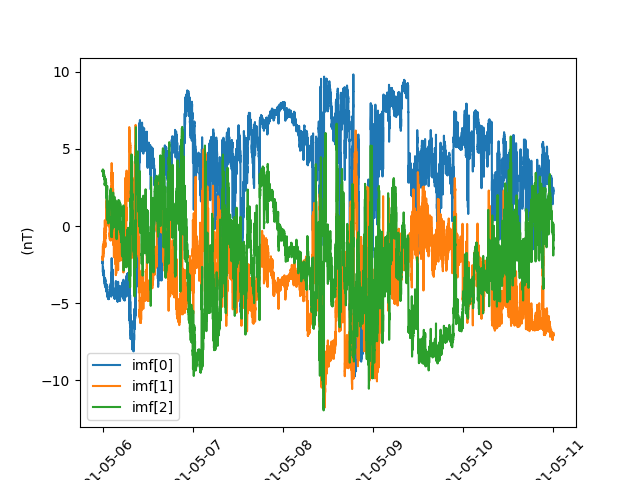

In [6]:
ace_mag.plot() # Plots the IMF data for the data range

In [7]:
time_mag = ace_mag.time # x-axis
B = ace_mag.values # all B-field values
B_unit = ace_mag.unit 

In [8]:
start_time = time.time() # Comparing which method is more efficient
Bx = ace_mag.filter_columns(["imf[0]"]).values # Uses filtering to obtain components of B-field
By = ace_mag.filter_columns(["imf[1]"]).values
Bz = ace_mag.filter_columns(["imf[2]"]).values
print("--- %s seconds ---" % (time.time() - start_time)) # Shorter time than following method

--- 0.008631467819213867 seconds ---


In [9]:
start_time = time.time()
Bx = [b[0] for b in B] # Uses iterative techniques to obtain components of B-field
By = [b[1] for b in B]
Bz = [b[2] for b in B]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.03513789176940918 seconds ---


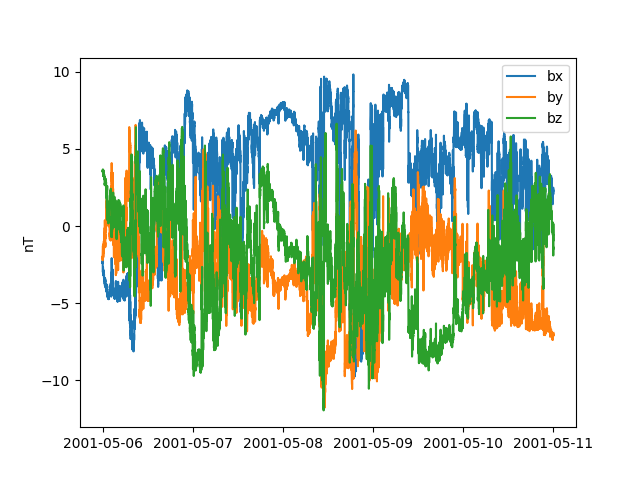

In [10]:
plt.figure()
plt.plot(time_mag, Bx, label='bx')
plt.plot(time_mag, By, label='by')
plt.plot(time_mag, Bz, label='bz')
plt.ylabel(B_unit)
plt.legend()
plt.show()

In [11]:
# Retrieves MFI (Magnetic Field Instrument) data from Wind satellite
wind_mag = spz.get_data(amda_tree.Parameters.Wind.MFI.wnd_mfi_high.wnd_bmagh, start_date, end_date)

<AxesSubplot: xlabel='time', ylabel=' (nT)'>

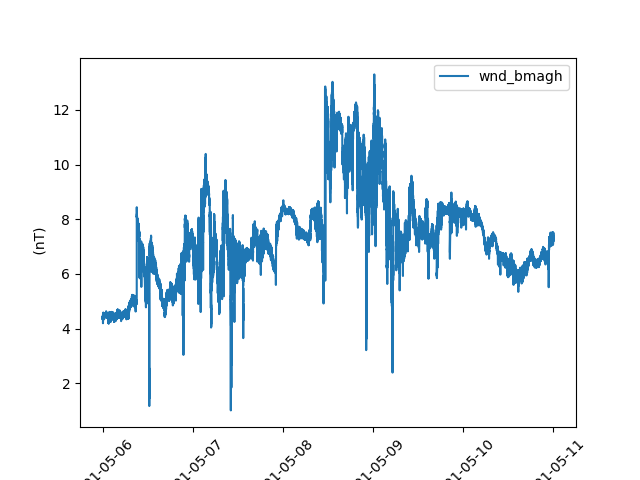

In [12]:
plt.figure()
wind_mag.plot()